# Proyecto Final



In [11]:
'''
!pip install pandas
!pip install nltk
!pip install matplotlib
!pip install wordcloud
'''

'\n!pip install pandas\n!pip install nltk\n!pip install matplotlib\n!pip install wordcloud\n'

## Import libraries

In [12]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /home/gitpod/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Import data as pandas dataframes

In [13]:
df_raw_p= pd.read_csv('../data/raw/Putin_Tweets.csv', )
df_raw_p.head()

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
0,Free Syrian Memes,@FreeSyrianMemes,2022-01-01T22:26:19.000Z,Free Syrian Memes\n@FreeSyrianMemes\n·\nJan 1,"Halt Russian aggression with 2-day shipping on ATGMs to Syrian rebels, Ukraine, Poland, Finland, and anyone else who wants to send a wire-guided “fuck Putin”\n3\n35",0,0,3,35,['https://pbs.twimg.com/media/FIDMAkeXsAcBOwG?format=jpg&name=small'],https://twitter.com/FreeSyrianMemes/status/1477405855578570761
1,ciciu,@_ciciulena,2022-01-01T20:42:30.000Z,ciciu\n@_ciciulena\n·\nJan 1,PUTIN?????????? #CIAO2021\n1\n2\n38,0,1,2,38,[],https://twitter.com/_ciciulena/status/1477379730525536263
2,TOM,@lonestarmoocher,2022-01-01T19:12:05.000Z,TOM\n@lonestarmoocher\n·\nJan 1,Looks like Lumpy had a meeting with Putin.\n10\n10\n56,0,10,10,56,['https://pbs.twimg.com/media/FICgVy4VgAMHEqH?format=jpg&name=small'],https://twitter.com/lonestarmoocher/status/1477356976250126336
3,Tom London,@TomLondon6,2022-01-01T22:39:56.000Z,Tom London\n@TomLondon6\n·\nJan 1,"What kind of country honours war criminals, like Blair\nAnd imprisons a man for publishing evidence of war crimes, like Assange?\n\nPutin’s Russia?\nXi’s China?\n\nNo, this repressive, tinpot country, the UK\n9\n218\n813",0,9,218,813,[],https://twitter.com/TomLondon6/status/1477409281993494531
4,Ukemonde,@ukemonde,2022-01-01T22:02:54.000Z,Ukemonde\n@ukemonde\n·\nJan 1,"Time for a putin tribunal!!\nQuote Tweet\nMichael MacKay\n@mhmck\n · Jan 1\nWhen Russian-occupied Ukraine, Georgia and Moldova are liberated Putin’s War will end. As long as the Russian regime of state terrorism is appeased the war in Europe will continue and expand.\n7\n16",0,0,7,16,"['https://pbs.twimg.com/media/FIDHb0SXMAcqHoh?format=jpg&name=small', 'https://pbs.twimg.com/profile_images/1513598405662187527/37NBzG-n_normal.jpg']",https://twitter.com/ukemonde/status/1477399960547172353


In [14]:
df_raw_z= pd.read_csv('../data/raw/Zelensky_Tweets.csv')
df_raw_z.head()

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
0,HillReporter.com,@HillReporter,2022-01-01T00:22:02.000Z,HillReporter.com\n@HillReporter\n·\nJan 1,"President Biden Says He ‘Made It Clear’ to Putin That Russia ‘Cannot Move On’ Ukraine, Will Speak With Zelensky\nhillreporter.com\nPresident Biden Says He 'Made It Clear' to Putin That Russia 'Cannot Move On' Ukraine, Will Speak...\nPresident Joe Biden said on Friday he made it clear to Russian President Vladimir Putin during their call a day earlier that he cannot “move on Ukraine.” President Biden said Friday he told Putin...\n13\n148\n701",0,13,148,701,['https://pbs.twimg.com/card_img/1546966415911129088/VBGIHWj3?format=jpg&name=small'],https://twitter.com/HillReporter/status/1477072590514446336
1,Stars and Stripes,@starsandstripes,2022-01-01T06:18:00.000Z,Stars and Stripes\n@starsandstripes\n·\nJan 1,"Following his call with Russian President Vladimir Putin, President Joe Biden plans to speak by phone with Ukrainian President Volodymyr Zelensky on Sunday amid growing alarm over Russia’s military buildup near its border with Ukraine.\nstripes.com\nBiden to speak with Ukraine president amid fears that Russia may once again invade Ukraine\nFollowing his call with Russian President Vladimir Putin, President Joe Biden plans to speak by phone with Ukrainian President Volodymyr Zelensky on Sunday amid growing alarm over Russia’s military...\n6\n9\n29",0,6,9,29,['https://pbs.twimg.com/card_img/1547334080676741121/cniV4Jyh?format=jpg&name=small'],https://twitter.com/starsandstripes/status/1477162169531879426
2,Jamie Fly,@jamiemfly,2022-01-01T14:58:22.000Z,Jamie Fly\n@jamiemfly\n·\nJan 1,"Thanks to \n@ZelenskyyUa\n for calling for the return of all prisoners illegally detained in #Crimea including \n@RFERL\n @radiosvoboda\n @krymrealii\n's Vladyslav Yesypenko in his New Year's address #FreeYesypenko #JournalismIsNotACrime\nrferl.org\nUkraine's Zelenskiy Makes Defiant Stand In New Year's Address\nIn his annual New Year's message broadcast late on December 31, Ukrainian President Volodymyr Zelenskiy expressed defiance amid a buildup of Russian forces on the other side of the country's border...\n9\n31",0,0,9,31,[],https://twitter.com/jamiemfly/status/1477293126666670085
3,Ivan Katchanovski,@I_Katchanovski,2022-01-01T19:26:23.000Z,Ivan Katchanovski\n@I_Katchanovski\n·\nJan 1,"#Zelensky in New Year greeting lavishly praises & showcases #farright Right Sector leadership member & Right Sector volunteer units at 8:03-23, 9:15-17, 12:39-48, 15:40-43, 16:30-17:12 & 20:46-47. He points out him & his Hero of Ukraine award at 16:38-45.\nyoutube.com\nПрезидент України Володимир Зеленський вітає з Новим роком.\n«Будують, творять і захищають Україну надзвичайні люди» – вітання з Новим роком від Президента Володимира Зеленського.\n1\n9\n21",0,1,9,21,[],https://twitter.com/I_Katchanovski/status/1477360573717352455
4,M. K. Bhadrakumar,@BhadraPunchline,2022-01-01T17:53:48.000Z,M. K. Bhadrakumar\n@BhadraPunchline\n·\nJan 1,"Zelensky: ""No army on the other side of the border frightens us, because a great army on our side of the border protects us... We can say we have returned Crimea to the global agenda so that one day we can say we have returned Crimea to Ukraine...\nrferl.org\nUkraine's Zelenskiy Makes Defiant Stand In New Year's Address\nIn his annual New Year's message broadcast late on December 31, Ukrainian President Volodymyr Zelenskiy expressed defiance amid a buildup of Russian forces on the other side of the country's border...\n4\n4\n7",0,4,4,7,[],https://twitter.com/BhadraPunchline/status/1477337274975088641


In [15]:
df_raw_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10737 entries, 0 to 10736
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   UserScreenName  10717 non-null  object
 1   UserName        10737 non-null  object
 2   Timestamp       10737 non-null  object
 3   Text            10737 non-null  object
 4   Embedded_text   10737 non-null  object
 5   Emojis          10737 non-null  object
 6   Comments        10737 non-null  object
 7   Likes           10737 non-null  object
 8   Retweets        10737 non-null  object
 9   Image link      10737 non-null  object
 10  Tweet URL       10737 non-null  object
dtypes: object(11)
memory usage: 922.8+ KB


In [16]:
df_raw_p.describe()

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
count,10717,10737,10737,10737,10737,10737,10737,10737,10737,10737,10737
unique,7893,8027,10551,10340,10737,1240,272,531,956,4523,10734
top,Mannerheim,@WarAgainstPutin,2022-03-06T23:57:26.000Z,Stefan Resists Putin\n@StefanK1117\n·\nJul 15,"Halt Russian aggression with 2-day shipping on ATGMs to Syrian rebels, Ukraine, Poland, Finland, and anyone else who wants to send a wire-guided “fuck Putin”\n3\n35",0,0,0,5,[],https://twitter.com/evanmcmurry/status/1494821119446204423
freq,49,49,3,8,1,8350,3106,1812,551,5874,2


In [17]:
df_raw_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11170 entries, 0 to 11169
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   UserScreenName  11151 non-null  object
 1   UserName        11170 non-null  object
 2   Timestamp       11170 non-null  object
 3   Text            11170 non-null  object
 4   Embedded_text   11170 non-null  object
 5   Emojis          11170 non-null  object
 6   Comments        11170 non-null  object
 7   Likes           11170 non-null  object
 8   Retweets        11170 non-null  object
 9   Image link      11170 non-null  object
 10  Tweet URL       11170 non-null  object
dtypes: object(11)
memory usage: 960.0+ KB


In [18]:
df_raw_z.describe()

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
count,11151,11170,11170,11170,11170,11170,11170,11170,11170,11170,11170
unique,8025,8184,11110,10518,11142,1398,276,555,945,3337,11167
top,The Kyiv Independent,@KyivIndependent,2022-03-16T23:44:05.000Z,VAXXED THO\n@rogue_corq\n·\nJul 13,Replying to \n@tugatripeira\n and \n@ZelenskyyUa\nBlessed be\n1\n1\n3,0,0,0,1,[],https://twitter.com/ChinasCanada/status/1548397512515411969
freq,73,73,3,8,5,8339,5486,5423,1540,7489,3


## Transform df

Make a copy of the raw dataset. 

The first step is to select the columns that we consider relevant for now.

In [19]:
df_interim_p = df_raw_p.copy()

In [20]:
df_interim_p.drop(columns=['UserScreenName',"Text", "Emojis","Image link"], axis=1, inplace=True)

In [21]:
df_interim_p.sample(5, random_state=123)

,UserName,Timestamp,Embedded_text,Comments,Likes,Retweets,Tweet URL
10112,@stuartpstevens,2022-07-12T12:14:43.000Z,"It’s not just Putin. There is a deep sickness in Russian society. They have failed every chance to become a civilized country and remain a gangster state that excels only in destruction, murder, oppression. Maybe there’s a path to change but until then they must be defeated.\nQuote Tweet\nMark Hertling\n@MarkHertling\n · Jul 12\nThe Russians are scum. twitter.com/visegrad24/sta…\n53\n277",0,53,277,https://twitter.com/stuartpstevens/status/1546830411900280833
3191,@AirAssets,2022-03-06T23:55:34.000Z,For everyone hating the Ukraine invasion but profiting off of it shame on you...you are feeding Putin with high oil prices we hurt him most when fuel was down\n3\n3\n9,3,3,9,https://twitter.com/AirAssets/status/1500621137843265542
628,@SBWheat1,2022-01-15T23:34:38.000Z,"#TrumpRally \n\nDefeated 45 had 4 years to ""Make America Great Again"" and ""Save America""\n\nHe gave tax cuts to the rich\n\nHe wrote love letters to Kim Jong-un\n\nPutin played him like a fiddle\n\nHe was impeached twice\n\nHe incited & conspired an insurrection\n\nHE LOST BY 7 MILLION VOTES\n176\n913\n2,793",176,913,"2,793",https://twitter.com/SBWheat1/status/1482496478404911111
1473,JamesLaMancusa@commongoodunited.com,2022-02-01T23:39:51.000Z,"Exactly! Putin/Russia stole Crimea (critical port), & now he's making his next move to expand their tentacles into to E Euro region (Ukraine borders 7 nations) & take over coastal area of Black Sea & Sea of Azov. Putin's a vulture like DJT who said Venezuela is ripe for US taking\nQuote Tweet\nKhashoggi’s Ghost\n@UROCKlive1\n · Feb 1\nDealing with Vladimir Putin is a lot like dealing with Republicans. It has to be done, but it's never a valid negotiation because none of them are ever acting in good faith.\n\nThey all lie. They all gaslight. They're all cheating. And they're all offended when you point this out.\n10\n16",0,10,16,https://twitter.com/JamesLamancusa/status/1488658384308125696
372,@starsandstripes,2022-01-08T23:59:00.000Z,"To Russian President Vladimir Putin, the collapse of the Soviet Union ""was the greatest geopolitical catastrophe of the century.""\nstripes.com\nPutin dreams of a Russian 'sphere of influence.' Kazakhstan's protesters are the latest to push...\nTo Russian President Vladimir Putin, the collapse of the Soviet Union ""was the greatest geopolitical catastrophe of the century.""\n3\n14\n19",3,14,19,https://twitter.com/starsandstripes/status/1479965894096965637


In [22]:
df_interim_z = df_raw_z.copy()

In [23]:
df_interim_z.drop(columns=['UserScreenName',"Text", "Emojis","Image link"], axis=1, inplace=True)

In [24]:
df_interim_z.sample(5, random_state=123)

,UserName,Timestamp,Embedded_text,Comments,Likes,Retweets,Tweet URL
9942,@HighgateRobin,2022-07-09T20:00:55.000Z,"Replying to \n@BrotherNumpsay\n and \n@KyivIndependent\nFrom my readings about Ukraine, it seems like half the officeholders were loyal to Russia or being paid by Russia for Ukrainian intel, even top people in its secret service. I think the US is giving Zelensky the dirt that they have on his people.\n5\n22\n421",5,22,421,https://twitter.com/HighgateRobin/status/1545860569177079809
9396,@juaninf09349964,2022-07-02T23:56:48.000Z,Replying to \n@Roj0Santo\n @gabrielboric\n and \n@ZelenskyyUa\nCandy candy? Por lo meretriz? \n1\n5,1,0,5,https://twitter.com/juaninf09349964/status/1543383219554467842
1976,@Elenamirko7,2022-02-08T13:29:20.000Z,Replying to \n@Aliaktann07\n @ZelenskyyUa\n and \n@EmmanuelMacron\nHe is not our friend.\n1\n2,1,0,2,https://twitter.com/Elenamirko7/status/1491041458010615818
7067,@HIRH,2022-05-21T21:59:10.000Z,"Replying to \n@ZelenskyyUa\n and \n@POTUS\nThank you both for showing up for the civilians whose lives are ruined by Putin’s disgusting violent grab for power & land. It’s not just you, it’s the world he’s after & we see him for what he is. #VladTheToxic #SlavaUkraini I my cousins are safe. \n1",0,0,1,https://twitter.com/HIRH/status/1528133324249628673
7412,@Dante__09,2022-05-28T21:42:10.000Z,"Replying to \n@BorisJohnson\n and \n@ZelenskyyUa\nAlthough it’s horrible what is happening in Ukraine. You do realise that, by selling arms to Ukraine, the U.K will be targeted.\n\nPutin has threatened the U.K, Johnson. Saying if you interfere, the U.K will see nuclear missiles.\n4\n4",4,0,4,https://twitter.com/Dante__09/status/1530665760460251138


Previously we could see that all the columns are of the object data type.
- The "Time Stamp" column should be datetime.
- The Retweets, Likes and Comments columns should be numeric.

In [25]:
df_interim_p['Timestamp'] = df_interim_p['Timestamp'].astype('datetime64')

Some of the records contain commas and letters, so we must remove these characters to transform them to numbers.

In [26]:
df_interim_p['Comments'] = df_interim_p['Comments'].str.replace(',', '').astype('int64')
df_interim_p['Likes'] = df_interim_p['Likes'].str.replace(',', '').replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype('int64')
df_interim_p['Retweets'] = df_interim_p['Retweets'].str.replace(',', '').replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype('int64')

In [27]:
df_interim_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10737 entries, 0 to 10736
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UserName       10737 non-null  object        
 1   Timestamp      10737 non-null  datetime64[ns]
 2   Embedded_text  10737 non-null  object        
 3   Comments       10737 non-null  int64         
 4   Likes          10737 non-null  int64         
 5   Retweets       10737 non-null  int64         
 6   Tweet URL      10737 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 587.3+ KB


In [28]:
df_interim_z['Timestamp'] = df_interim_z['Timestamp'].astype('datetime64')

In [29]:
df_interim_z['Comments'] = df_interim_z['Comments'].str.replace(',', '').astype('int64')
df_interim_z['Likes'] = df_interim_z['Likes'].str.replace(',', '').replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype('int64')
df_interim_z['Retweets'] = df_interim_z['Retweets'].str.replace(',', '').replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype('int64')

In [30]:
df_interim_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11170 entries, 0 to 11169
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UserName       11170 non-null  object        
 1   Timestamp      11170 non-null  datetime64[ns]
 2   Embedded_text  11170 non-null  object        
 3   Comments       11170 non-null  int64         
 4   Likes          11170 non-null  int64         
 5   Retweets       11170 non-null  int64         
 6   Tweet URL      11170 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 611.0+ KB


In [31]:
df_interim_p.sample(5, random_state=123)

,UserName,Timestamp,Embedded_text,Comments,Likes,Retweets,Tweet URL
10112,@stuartpstevens,2022-07-12 12:14:43,"It’s not just Putin. There is a deep sickness in Russian society. They have failed every chance to become a civilized country and remain a gangster state that excels only in destruction, murder, oppression. Maybe there’s a path to change but until then they must be defeated.\nQuote Tweet\nMark Hertling\n@MarkHertling\n · Jul 12\nThe Russians are scum. twitter.com/visegrad24/sta…\n53\n277",0,53,277,https://twitter.com/stuartpstevens/status/1546830411900280833
3191,@AirAssets,2022-03-06 23:55:34,For everyone hating the Ukraine invasion but profiting off of it shame on you...you are feeding Putin with high oil prices we hurt him most when fuel was down\n3\n3\n9,3,3,9,https://twitter.com/AirAssets/status/1500621137843265542
628,@SBWheat1,2022-01-15 23:34:38,"#TrumpRally \n\nDefeated 45 had 4 years to ""Make America Great Again"" and ""Save America""\n\nHe gave tax cuts to the rich\n\nHe wrote love letters to Kim Jong-un\n\nPutin played him like a fiddle\n\nHe was impeached twice\n\nHe incited & conspired an insurrection\n\nHE LOST BY 7 MILLION VOTES\n176\n913\n2,793",176,913,2793,https://twitter.com/SBWheat1/status/1482496478404911111
1473,JamesLaMancusa@commongoodunited.com,2022-02-01 23:39:51,"Exactly! Putin/Russia stole Crimea (critical port), & now he's making his next move to expand their tentacles into to E Euro region (Ukraine borders 7 nations) & take over coastal area of Black Sea & Sea of Azov. Putin's a vulture like DJT who said Venezuela is ripe for US taking\nQuote Tweet\nKhashoggi’s Ghost\n@UROCKlive1\n · Feb 1\nDealing with Vladimir Putin is a lot like dealing with Republicans. It has to be done, but it's never a valid negotiation because none of them are ever acting in good faith.\n\nThey all lie. They all gaslight. They're all cheating. And they're all offended when you point this out.\n10\n16",0,10,16,https://twitter.com/JamesLamancusa/status/1488658384308125696
372,@starsandstripes,2022-01-08 23:59:00,"To Russian President Vladimir Putin, the collapse of the Soviet Union ""was the greatest geopolitical catastrophe of the century.""\nstripes.com\nPutin dreams of a Russian 'sphere of influence.' Kazakhstan's protesters are the latest to push...\nTo Russian President Vladimir Putin, the collapse of the Soviet Union ""was the greatest geopolitical catastrophe of the century.""\n3\n14\n19",3,14,19,https://twitter.com/starsandstripes/status/1479965894096965637


In [32]:
df_interim_z.sample(5, random_state=123)

,UserName,Timestamp,Embedded_text,Comments,Likes,Retweets,Tweet URL
9942,@HighgateRobin,2022-07-09 20:00:55,"Replying to \n@BrotherNumpsay\n and \n@KyivIndependent\nFrom my readings about Ukraine, it seems like half the officeholders were loyal to Russia or being paid by Russia for Ukrainian intel, even top people in its secret service. I think the US is giving Zelensky the dirt that they have on his people.\n5\n22\n421",5,22,421,https://twitter.com/HighgateRobin/status/1545860569177079809
9396,@juaninf09349964,2022-07-02 23:56:48,Replying to \n@Roj0Santo\n @gabrielboric\n and \n@ZelenskyyUa\nCandy candy? Por lo meretriz? \n1\n5,1,0,5,https://twitter.com/juaninf09349964/status/1543383219554467842
1976,@Elenamirko7,2022-02-08 13:29:20,Replying to \n@Aliaktann07\n @ZelenskyyUa\n and \n@EmmanuelMacron\nHe is not our friend.\n1\n2,1,0,2,https://twitter.com/Elenamirko7/status/1491041458010615818
7067,@HIRH,2022-05-21 21:59:10,"Replying to \n@ZelenskyyUa\n and \n@POTUS\nThank you both for showing up for the civilians whose lives are ruined by Putin’s disgusting violent grab for power & land. It’s not just you, it’s the world he’s after & we see him for what he is. #VladTheToxic #SlavaUkraini I my cousins are safe. \n1",0,0,1,https://twitter.com/HIRH/status/1528133324249628673
7412,@Dante__09,2022-05-28 21:42:10,"Replying to \n@BorisJohnson\n and \n@ZelenskyyUa\nAlthough it’s horrible what is happening in Ukraine. You do realise that, by selling arms to Ukraine, the U.K will be targeted.\n\nPutin has threatened the U.K, Johnson. Saying if you interfere, the U.K will see nuclear missiles.\n4\n4",4,0,4,https://twitter.com/Dante__09/status/1530665760460251138


In [33]:
df_interim_p.describe()

,Comments,Likes,Retweets
count,10737.000000,10737.000000,10737.000000
mean,13.565614,54.280339,231.704946
std,112.524658,400.041898,1734.748321
min,0.000000,0.000000,0.000000
25%,0.000000,1.000000,7.000000
50%,1.000000,3.000000,16.000000
75%,4.000000,12.000000,47.000000
max,5356.000000,16400.000000,66100.000000


In [34]:
df_interim_z.describe()

,Comments,Likes,Retweets
count,11170.000000,11170.000000,11170.000000
mean,12.313339,65.628201,330.624978
std,103.798338,1055.005784,6184.822205
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000
50%,1.000000,1.000000,5.000000
75%,2.000000,6.000000,28.000000
max,4698.000000,103900.000000,620000.000000


We renamed the column "Embedded_Text" to make it more clear.

In [35]:
df_interim_p.rename(columns = {'Embedded_text':'Tweet'}, inplace = True)

In [36]:
df_interim_p.head()

,UserName,Timestamp,Tweet,Comments,Likes,Retweets,Tweet URL
0,@FreeSyrianMemes,2022-01-01 22:26:19,"Halt Russian aggression with 2-day shipping on ATGMs to Syrian rebels, Ukraine, Poland, Finland, and anyone else who wants to send a wire-guided “fuck Putin”\n3\n35",0,3,35,https://twitter.com/FreeSyrianMemes/status/1477405855578570761
1,@_ciciulena,2022-01-01 20:42:30,PUTIN?????????? #CIAO2021\n1\n2\n38,1,2,38,https://twitter.com/_ciciulena/status/1477379730525536263
2,@lonestarmoocher,2022-01-01 19:12:05,Looks like Lumpy had a meeting with Putin.\n10\n10\n56,10,10,56,https://twitter.com/lonestarmoocher/status/1477356976250126336
3,@TomLondon6,2022-01-01 22:39:56,"What kind of country honours war criminals, like Blair\nAnd imprisons a man for publishing evidence of war crimes, like Assange?\n\nPutin’s Russia?\nXi’s China?\n\nNo, this repressive, tinpot country, the UK\n9\n218\n813",9,218,813,https://twitter.com/TomLondon6/status/1477409281993494531
4,@ukemonde,2022-01-01 22:02:54,"Time for a putin tribunal!!\nQuote Tweet\nMichael MacKay\n@mhmck\n · Jan 1\nWhen Russian-occupied Ukraine, Georgia and Moldova are liberated Putin’s War will end. As long as the Russian regime of state terrorism is appeased the war in Europe will continue and expand.\n7\n16",0,7,16,https://twitter.com/ukemonde/status/1477399960547172353


In [37]:
df_interim_z.rename(columns = {'Embedded_text':'Tweet'}, inplace = True)

In [38]:
df_interim_z.head()

,UserName,Timestamp,Tweet,Comments,Likes,Retweets,Tweet URL
0,@HillReporter,2022-01-01 00:22:02,"President Biden Says He ‘Made It Clear’ to Putin That Russia ‘Cannot Move On’ Ukraine, Will Speak With Zelensky\nhillreporter.com\nPresident Biden Says He 'Made It Clear' to Putin That Russia 'Cannot Move On' Ukraine, Will Speak...\nPresident Joe Biden said on Friday he made it clear to Russian President Vladimir Putin during their call a day earlier that he cannot “move on Ukraine.” President Biden said Friday he told Putin...\n13\n148\n701",13,148,701,https://twitter.com/HillReporter/status/1477072590514446336
1,@starsandstripes,2022-01-01 06:18:00,"Following his call with Russian President Vladimir Putin, President Joe Biden plans to speak by phone with Ukrainian President Volodymyr Zelensky on Sunday amid growing alarm over Russia’s military buildup near its border with Ukraine.\nstripes.com\nBiden to speak with Ukraine president amid fears that Russia may once again invade Ukraine\nFollowing his call with Russian President Vladimir Putin, President Joe Biden plans to speak by phone with Ukrainian President Volodymyr Zelensky on Sunday amid growing alarm over Russia’s military...\n6\n9\n29",6,9,29,https://twitter.com/starsandstripes/status/1477162169531879426
2,@jamiemfly,2022-01-01 14:58:22,"Thanks to \n@ZelenskyyUa\n for calling for the return of all prisoners illegally detained in #Crimea including \n@RFERL\n @radiosvoboda\n @krymrealii\n's Vladyslav Yesypenko in his New Year's address #FreeYesypenko #JournalismIsNotACrime\nrferl.org\nUkraine's Zelenskiy Makes Defiant Stand In New Year's Address\nIn his annual New Year's message broadcast late on December 31, Ukrainian President Volodymyr Zelenskiy expressed defiance amid a buildup of Russian forces on the other side of the country's border...\n9\n31",0,9,31,https://twitter.com/jamiemfly/status/1477293126666670085
3,@I_Katchanovski,2022-01-01 19:26:23,"#Zelensky in New Year greeting lavishly praises & showcases #farright Right Sector leadership member & Right Sector volunteer units at 8:03-23, 9:15-17, 12:39-48, 15:40-43, 16:30-17:12 & 20:46-47. He points out him & his Hero of Ukraine award at 16:38-45.\nyoutube.com\nПрезидент України Володимир Зеленський вітає з Новим роком.\n«Будують, творять і захищають Україну надзвичайні люди» – вітання з Новим роком від Президента Володимира Зеленського.\n1\n9\n21",1,9,21,https://twitter.com/I_Katchanovski/status/1477360573717352455
4,@BhadraPunchline,2022-01-01 17:53:48,"Zelensky: ""No army on the other side of the border frightens us, because a great army on our side of the border protects us... We can say we have returned Crimea to the global agenda so that one day we can say we have returned Crimea to Ukraine...\nrferl.org\nUkraine's Zelenskiy Makes Defiant Stand In New Year's Address\nIn his annual New Year's message broadcast late on December 31, Ukrainian President Volodymyr Zelenskiy expressed defiance amid a buildup of Russian forces on the other side of the country's border...\n4\n4\n7",4,4,7,https://twitter.com/BhadraPunchline/status/1477337274975088641


Some of the tweets start with "Replying to" because they are responses to other tweets. We will create a new column to later analyze this data.

In [39]:
df_interim_p['Tweet'].str.startswith('Replying to').value_counts()

False    6812
True     3925
Name: Tweet, dtype: int64

In [40]:
df_interim_z['Tweet'].str.startswith('Replying to').value_counts()

True     6365
False    4805
Name: Tweet, dtype: int64

In [41]:
df_interim_p['Is_response'] = df_interim_p['Tweet'].apply(lambda x: 1 if x.startswith('Replying to') else 0)

In [42]:
df_interim_p['Is_response'].value_counts()

0    6812
1    3925
Name: Is_response, dtype: int64

In [43]:
df_interim_z['Is_response'] = df_interim_z['Tweet'].apply(lambda x: 1 if x.startswith('Replying to') else 0)

In [44]:
df_interim_z['Is_response'].value_counts()

1    6365
0    4805
Name: Is_response, dtype: int64

In [45]:
df_interim_p.sample(10)

,UserName,Timestamp,Tweet,Comments,Likes,Retweets,Tweet URL,Is_response
6066,@ektaka,2022-05-02 23:49:47,Replying to \n@XavierResists\nSo 63 Republicans voted for Putin?\n1\n2,0,1,2,https://twitter.com/ektaka/status/1521275792474337282,1
508,@JadaJones57,2022-01-12 23:22:55,"60% of USA is fully on board with full voting rights. The tiny % of people in Senate, stopping it, is shameful, beyond shameful. Putin is right. Democracy doesn't work\n2\n3\n8",2,3,8,https://twitter.com/JadaJones57/status/1481406366191439881,0
2072,@journalistWH,2022-02-13 23:11:20,PUTIN ORDERED HIS TROOPS ON THE UKRAINIAN BORDER TO BE ON ALERT.\n\n#Russian #Ukrainia #usa #Reporter #News\n1\n5\n18,1,5,18,https://twitter.com/journalistWH/status/1492999860756389889,0
8742,@madameshawshank,2022-06-24 22:59:32,"Replying to \n@CaroleS54218418\n and \n@caslernoel\nPutin, & Murdoch \n\nWithout them there’d have been no President #Trump\n1\n5\n17",1,5,17,https://twitter.com/madameshawshank/status/1540469703415824384,1
3694,@dianekovacs,2022-03-16 23:55:04,"Replying to \n@DSA_Intl_Comm\nWorking class people deserve to be able to live too. Apparently this is not your position. I sincerely hope that the sanctions against Putin impact your funding negatively. You won't see any more from me or mine.\nreuters.com\nUkraine's Mariupol says 1,582 civilians killed by Russian shelling and blockade\nAt least 1,582 civilians in Ukraine's southeastern city of Mariupol have been killed as a result of Russian shelling and a 12-day blockade, the city council said in an online statement on Friday.\n10",0,0,10,https://twitter.com/dianekovacs/status/1504244890317819904,1
3367,@DailyNewsEgypt,2022-03-10 23:52:27,"Facebook and Instagram to temporarily allow calls for violence against Russians. They will also temporarily allow some posts that call for death to #Russian President Putin or Belarusian President Lukashenko in countries including #Russia, #Ukraine & Poland: Reuters\n\n#UkraineWar\n1\n7\n9",1,7,9,https://twitter.com/DailyNewsEgypt/status/1502069904782077963,0
6575,@openforum_au,2022-05-12 23:43:05,"Putin's framing of the invasion as a 'special military operation' rather than declaring war means less punishment for troops refusing to fight - encouraging greater desertion. #StandWithUkraineNOW\ntheguardian.com\n‘They were furious’: the Russian soldiers refusing to fight in Ukraine\nTroops are saying no to officers, knowing that punishment is light while Russia is not technically at war\n1\n5",0,1,5,https://twitter.com/openforum_au/status/1524897984105914369,0
9384,@laino45,2022-07-06 23:48:58,"Replying to \n@SweetingElaine\nBut wait, I thought Putin was behind Canada's Freedom Convoy? So does that mean Putin is behind Canada's Diagolon who are behind the Dutch protest?\n\nThe funniest part is that there are some people who watch the CBC that will actually believe this.\nGIF\nALT\n3\n8\n29",3,8,29,https://twitter.com/laino45/status/1544830798808825856,1
5777,@furyu_me,2022-04-26 23:33:39,Replying to \n@furyu_me\n @TheFeistyHarper\n and \n@MollyJongFast\nWhich will be ... never. Trump permanent president a la Putin.\n1\n10,1,0,10,https://twitter.com/furyu_me/status/1519097405404180480,1
7324,@BitterTonic,2022-05-27 22:59:44,"Replying to \n@bumbeanbannana\n and \n@jk_rowling\nit's a propaganda technique. Putin does this - he makes up insane statements, and then he just needs people to repeat them. The more they are repeated anywhere, people start to think it's true.\n1\n15",0,1,15,https://twitter.com/BitterTonic/status/1530322892147261442,1


In [46]:
df_interim_z.sample(10)

,UserName,Timestamp,Tweet,Comments,Likes,Retweets,Tweet URL,Is_response
2621,@natespuewell,2022-02-21 22:51:09,"As Russia invades Ukraine, remember that Trump …\n-illegally withheld $214 million in military aide to Ukraine\n-extorted Zelensky to force a sham investigation of opponent\n-tried to destroy NATO\n-held secret meetings with Putin\n\nBut the DOJ has put Trump is above the law.\n5\n43\n102",5,43,102,https://twitter.com/natespuewell/status/1495893885855350784,0
5433,@futuredude,2022-04-19 23:37:49,"No sign of life from Gonzalo Lira: Another Zelensky critic in Ukraine disappeared - Then24 http://then24.com/2022/04/19/no-sign-of-life-from-gonzalo-lira-another-zelensky-critic-in-ukraine-disappeared/… #GonzaloLira via \n@then24dotcom\nthen24.com\nNo sign of life from Gonzalo Lira: Another Zelensky critic in Ukraine disappeared - Then24\n19 Apr 2022 10:20 p.m by Dagmar HennAmidst the bombardment of information and horror that war is, there is always a single piece of information that is\n13\n126\n251",13,126,251,https://twitter.com/futuredude/status/1516561739944505347,0
7119,@1deedeeonlyD,2022-05-22 21:25:04,Replying to \n@AVindman\n and \n@ZelenskyyUa\nThat is a strong 'I got you bro' hug. True emotion happening there. Duda and Heger of Slovakia provide a counterweight of support versus Scholz and Macron.\n9,0,0,9,https://twitter.com/1deedeeonlyD/status/1528487131362078720,1
10693,@johntaylor007,2022-07-13 11:56:05,"Oh, bit they'll continue to do it because this admin and RINOs are fools. Zelensky has played them and so our govt has played its people. Who do you think is making money from this type of deal. Pelosi maybe? Bidens? McConnell?\ngettr.com\nLiz Kurtz on GETTR: @stevebannon Oh, bit they'll continue to do it because this admin and...\nOh, bit they'll continue to do it because this admin and RINOs are fools. Zelensky has played them and so our govt has played its people. Who do you think is making money from this type of deal....",0,0,0,https://twitter.com/johntaylor007/status/1547188110462689282,0
2853,@darksecretplace,2022-02-25 23:48:17,"They were projected to drive in thru light resistance and ring Kiev for a 360 degree final assault. Basically filling vehicles with poorly trained infantry for the attritional numbers game of Urban Combat. Or, Zelensky would surrender.\nNone of that has gone to plan.\n2\n9\n46",2,9,46,https://twitter.com/darksecretplace/status/1497357815752519680,0
2941,@PaulSorrentino3,2022-02-27 23:58:29,homeless people are 1 million times braver and stronger than zelensky\n9\n32\n149,9,32,149,https://twitter.com/PaulSorrentino3/status/1498085157273620483,0
7691,@stubbsy1927,2022-06-02 17:23:58,Replying to \n@DrFionaCares\n @ArchRose90\n and \n@ZelenskyyUa\nThe Queen her mum and sister pre world war 2\n7,0,0,7,https://twitter.com/stubbsy1927/status/1532412720796028928,1
3423,@chocafella,2022-03-08 23:20:45,"Replying to \n@pritipatel\n and \n@ZelenskyyUa\nYeah , but we aren't. Get your finger out!\n2",0,0,2,https://twitter.com/chocafella/status/1501337152986116107,1
10179,@NaijaNewsWire,2022-07-10 16:48:05,Zelensky responds to Putin falsely calling him a Nazi\nnewscurators.net\nZelensky responds to Putin falsely calling him a Nazi,0,0,0,https://twitter.com/NaijaNewsWire/status/1546174431919329280,0
443,@TinaMay20,2022-01-10 07:36:46,"Replying to \n@jamis_dempsey\n @medeabenjamin\n and \n@commondreams\nThat is exactly what citizens in free countries do, elect presidents who will do what they want. Zelensky is a case in point. He was elected for not supporting Russia. If Putin gets his coup, it will produce a pro-russia puppet, despite it all.\n2\n1",2,0,1,https://twitter.com/TinaMay20/status/1480443485559865344,1


## Preprocess the tweets.

In [47]:
#Remove symbols

def no_symbol(tweet):
    return re.sub("[^a-z0-9]"," ", tweet)

def repeated_words(tweet):
    return re.sub(r'\b(\w+)( \1\b)+', r'\1', tweet)

def remove_users(tweet):
    tweet = re.sub('(Replying to \s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove response info
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove tweeted at
    return tweet
    
def no_num(tweet):
    return re.sub('([0-9]+)', '', tweet)

def double_space(tweet):
    return re.sub('\s+', ' ', tweet)

def no_links(tweet):
    tweet = re.sub(r'http\S+', '', tweet)   # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet)  # remove bitly links
    tweet = tweet.strip('[link]')   # remove [links]
    tweet = re.sub(r'pic.twitter\S+','', tweet)
    return tweet

def remove_quoted(tweet):
    tweet = re.sub(r'Quote Tweet.*', '', tweet) 
    return tweet
   


In [48]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

In [49]:
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

In [50]:
#Extract stopwords
def clean_stopwords(text: str,stop_dict: dict)->str:
    if text is not None:
        words = text.split()
        words_clean = []
        for word in words:
            if word not in stop_dict:
                words_clean.append(word)
        result = ' '.join(words_clean)
    else:
        result = None
    return result

In [51]:
def preprocess(df):
    
    #Create new column
    df['Clean_Tweet'] = df["Tweet"]

    # Expanding Contractions
    df['Clean_Tweet']=df['Clean_Tweet'].apply(lambda x:expand_contractions(x))

      #Remove mentions and replying info
    df['Clean_Tweet']=df['Clean_Tweet'].apply(remove_users)

    # Remove white spaces
    df['Clean_Tweet'] = df['Clean_Tweet'].str.strip()

    #Remove double spaces

    df['Clean_Tweet']=df['Clean_Tweet'].apply(double_space)

    #Remove quoted tweets

    df['Clean_Tweet']=df['Clean_Tweet'].apply(remove_quoted)

     #Remove links

    df['Clean_Tweet']=df['Clean_Tweet'].apply(no_links)

    
    #To lower case

    df['Clean_Tweet'] = df['Clean_Tweet'].str.lower()

    #Remove repeated words

    df['Clean_Tweet']=df['Clean_Tweet'].apply(repeated_words)

    #Remove non-alphanumeric characters

    df['Clean_Tweet']=df['Clean_Tweet'].apply(no_symbol)

    #Remove repeated letters

    df['Clean_Tweet']=df['Clean_Tweet'].str.replace(r"([a-zA-Z])\1{2,}",r"\1",regex=True)

    #Remove numbers
    
    df['Clean_Tweet']=df['Clean_Tweet'].apply(no_num)


    stop_dict = stopwords.words('english')
    df['Clean_Tweet']=df['Clean_Tweet'].apply(lambda x: clean_stopwords(x, stop_dict = stop_dict))
    df['Clean_Tweet']=df['Clean_Tweet'].str.replace(r'''['!,.]''', '', regex = True)



    return df
    


In [52]:
df_interim_p = preprocess(df_interim_p)

In [53]:
df_interim_p[['Tweet', 'Clean_Tweet']].sample(15, random_state=123)

,Tweet,Clean_Tweet
10112,"It’s not just Putin. There is a deep sickness in Russian society. They have failed every chance to become a civilized country and remain a gangster state that excels only in destruction, murder, oppression. Maybe there’s a path to change but until then they must be defeated.\nQuote Tweet\nMark Hertling\n@MarkHertling\n · Jul 12\nThe Russians are scum. twitter.com/visegrad24/sta…\n53\n277",putin deep sickness russian society failed every chance become civilized country remain gangster state excels destruction murder oppression maybe path change must defeated
3191,For everyone hating the Ukraine invasion but profiting off of it shame on you...you are feeding Putin with high oil prices we hurt him most when fuel was down\n3\n3\n9,everyone hating ukraine invasion profiting shame feeding putin high oil prices hurt fuel
628,"#TrumpRally \n\nDefeated 45 had 4 years to ""Make America Great Again"" and ""Save America""\n\nHe gave tax cuts to the rich\n\nHe wrote love letters to Kim Jong-un\n\nPutin played him like a fiddle\n\nHe was impeached twice\n\nHe incited & conspired an insurrection\n\nHE LOST BY 7 MILLION VOTES\n176\n913\n2,793",trumprally defeated years make america great save america gave tax cuts rich wrote love letters kim jong un putin played like fiddle impeached twice incited conspired insurrection lost million votes
1473,"Exactly! Putin/Russia stole Crimea (critical port), & now he's making his next move to expand their tentacles into to E Euro region (Ukraine borders 7 nations) & take over coastal area of Black Sea & Sea of Azov. Putin's a vulture like DJT who said Venezuela is ripe for US taking\nQuote Tweet\nKhashoggi’s Ghost\n@UROCKlive1\n · Feb 1\nDealing with Vladimir Putin is a lot like dealing with Republicans. It has to be done, but it's never a valid negotiation because none of them are ever acting in good faith.\n\nThey all lie. They all gaslight. They're all cheating. And they're all offended when you point this out.\n10\n16",exactly putin russia stole crimea critical port making next move expand tentacles e euro region ukraine borders nations take coastal area black sea sea azov putin vulture like djt said venezuela ripe us taking
372,"To Russian President Vladimir Putin, the collapse of the Soviet Union ""was the greatest geopolitical catastrophe of the century.""\nstripes.com\nPutin dreams of a Russian 'sphere of influence.' Kazakhstan's protesters are the latest to push...\nTo Russian President Vladimir Putin, the collapse of the Soviet Union ""was the greatest geopolitical catastrophe of the century.""\n3\n14\n19",russian president vladimir putin collapse soviet union greatest geopolitical catastrophe century stripes com putin dreams russian isphere influence kazakhstan protesters latest push russian president vladimir putin collapse soviet union greatest geopolitical catastrophe century
5332,"Replying to \n@ClintEhrlich\nThe more grotesquely indefensible his aggression becomes, the more baroque the apologetics of the Putin apologists get. We are in a fascinating race to the bottom.\n1\n2\n10",grotesquely indefensible aggression becomes baroque apologetics putin apologists get fascinating race bottom
6291,"It’s \n@ggreenwald\n GO PUTIN ! Greenwood.\nQuote Tweet\nGlenn Greenwald\n@ggreenwald\n · May 8\nI hope liberals are proud of their moral hero, the conscience of the nation, who weaponizes private conversations he claims to have had with someone's mother, then publicizes them to malign his critics.\n\nTransfer more of your cash to him to help defeat TRUMP! twitter.com/SteveSchmidtSE…\nShow this thread\n51\n171\n1,910",go putin greenwood
1509,"Not excusing Putin, who has his own reasons for threatening Ukraine, but isn't it interesting that America, safe from invasion, continually interferes in countries to its east, across the Atlantic, while many of its citizens don't even know where they are?\nft.com\nUkraine through the lens of history\nFormer ambassador Rodric Braithwaite

In [54]:
df_interim_z= preprocess(df_interim_z)

In [55]:
df_interim_z[['Tweet', 'Clean_Tweet']].sample(15, random_state=123)

,Tweet,Clean_Tweet
9942,"Replying to \n@BrotherNumpsay\n and \n@KyivIndependent\nFrom my readings about Ukraine, it seems like half the officeholders were loyal to Russia or being paid by Russia for Ukrainian intel, even top people in its secret service. I think the US is giving Zelensky the dirt that they have on his people.\n5\n22\n421",readings ukraine seems like half officeholders loyal russia paid russia ukrainian intel even top people secret service think us giving zelensky dirt people
9396,Replying to \n@Roj0Santo\n @gabrielboric\n and \n@ZelenskyyUa\nCandy candy? Por lo meretriz? \n1\n5,candy por lo meretriz
1976,Replying to \n@Aliaktann07\n @ZelenskyyUa\n and \n@EmmanuelMacron\nHe is not our friend.\n1\n2,friend
7067,"Replying to \n@ZelenskyyUa\n and \n@POTUS\nThank you both for showing up for the civilians whose lives are ruined by Putin’s disgusting violent grab for power & land. It’s not just you, it’s the world he’s after & we see him for what he is. #VladTheToxic #SlavaUkraini I my cousins are safe. \n1",thank showing civilians whose lives ruined putin disgusting violent grab power land world see vladthetoxic slavaukraini cousins safe
7412,"Replying to \n@BorisJohnson\n and \n@ZelenskyyUa\nAlthough it’s horrible what is happening in Ukraine. You do realise that, by selling arms to Ukraine, the U.K will be targeted.\n\nPutin has threatened the U.K, Johnson. Saying if you interfere, the U.K will see nuclear missiles.\n4\n4",although horrible happening ukraine realise selling arms ukraine u k targeted putin threatened u k johnson saying interfere u k see nuclear missiles
9162,"Good for Oz. Seems they are probably exceeding the cowardly, appeasing #Germany in their efforts.\n@ZelenskyyUa\n @BorisJohnson\n @MorawieckiM\n @vonderleyen\n @ellymelly\n @IngridaSimonyte\nQuote Tweet\nDefence of Ukraine\n@DefenceU\nUkraine government organization\n · Jun 29\nAustralia has become a major non-NATO supplier of military aid to Ukraine. is so far from , yet is one our closest partners! Our nations share a love of freedom and respect for the environment. Your weapons will help us with pest control of our fields. Thank you!\n0:46\n274.6K views\n2\n3",good oz seems probably exceeding cowardly appeasing germany efforts
10614,Replying to \n@DashDobrofsky\n @sandkey211\n and \n@BetoORourke\nAbbott and Cruz are Texas' Putin and Medvedev. O'Rourke is Texas' Zelensky ! Both O'Rourke and Zelensky have the balls to defend democracy and their fellow citizens. And they will win !\n1\n16\n35,abbott cruz texas putin medvedev rourke texas zelensky rourke zelensky balls defend democracy fellow citizens win
6984,"Replying to \n@BorisJohnson\n and \n@ZelenskyyUa\nTo be considered seriously as a politician of international standing- a statesman - it would first be essential to be taken seriously, respected, if not agreed-with, by a majority of people in your own country. This is not something for which you are remotely equipped.\n6",considered seriously politician international standing statesman would first essential taken seriously respected agreed majority people country something remotely equipped
5729,"Apparently this guy is the zelensky of Somalia, with \n@KFosterFCDO\n directly supporting his campaign n pushing for a regime change, and James swan interviewing potential speakers of Parliament who could pave for Dani takeover.\n6\n13\n51",apparently guy zelensky somalia directly supporting campaign n pushing regime change james swan interviewing potential speakers parliament could pave dani takeover
10809,Replying to \n@OlenaHalushka\nWhat you wanna bet that 2M people are Russian and weren't forced to go anywhere but moved to Russia to get away from Zelensky's artillery shells?\n10\n4\n124,wanna bet people russian forced go anywhere moved russia get away zelensky artillery shells


In [56]:
df_interim_p.to_csv('../data/interim/Putin_tweets.csv', index=False)

In [57]:
df_interim_z.to_csv('../data/interim/Zelensky_tweets.csv', index=False)

## EDA

Tweets that mention Putin

In [58]:
#Most retweeted tweets

df_interim_p.sort_values(by = 'Retweets', ascending = False)[['UserName','Clean_Tweet', 'Retweets']][:10]

,UserName,Clean_Tweet,Retweets
6538,@DanRather,voting aid ukraine excuse away putin murderous aggression might small tip really think freedom democracy k k,66100
2439,@joncoopertweets,president biden steadfast broadcasting putin every move might one savviest war avoidance moves made president generation k,55300
3805,@OccupyDemocrats,breaking news major loss putin nato announces sending air defense system ukraine order help fight russia bomber jets rt thank nato standing ukraine k k,54800
5477,@POTUS,russia continues grind brutalities ukraine putin banking us losing interest betting western unity crack prove wrong k,46000
6800,@TimothyDSnyder,senseless shelter putin sense losing figure act protect k k,36700
4164,@davenewworld_2,russians putin waving new flag without red stripe symbolize removal blood flag trend putin want going viral russia k k,36500
2755,@IAPonomarenko,happening ukraine absolutely unthinkable still get russians obey putin absolutely psychopathic orders k,36400
9634,@JayinKyiv,warning cigs ukraine says quit smoking get see putin dies k,31900
10178,@JackPosobiec,john bolton realize publicly admitted us coups around world like putin saying along k,29500
6481,@McFaul,wish hearing outrage leaders middle east africa putin showing zero concern food supplies countries zero k,29400


In [59]:
#Most liked tweets

df_interim_p.sort_values(by = 'Likes', ascending = False)[['UserName','Clean_Tweet', 'Likes']][:10]

,UserName,Clean_Tweet,Likes
3805,@OccupyDemocrats,breaking news major loss putin nato announces sending air defense system ukraine order help fight russia bomber jets rt thank nato standing ukraine k k,16400
6538,@DanRather,voting aid ukraine excuse away putin murderous aggression might small tip really think freedom democracy k k,13900
4164,@davenewworld_2,russians putin waving new flag without red stripe symbolize removal blood flag trend putin want going viral russia k k,11400
6800,@TimothyDSnyder,senseless shelter putin sense losing figure act protect k k,11300
4311,@atrupar,trump calls putin release dirt biden family right since exactly fan country new interview real america voice k,8504
4507,@LatestAnonPress,looks like scenes horror movie result murders hundreds civilians russian soldiers ukraine town bucha near kyiv putin needs stopped following media includes potentially sensitive content change settings view k,8245
5477,@POTUS,russia continues grind brutalities ukraine putin banking us losing interest betting western unity crack prove wrong k,7985
2439,@joncoopertweets,president biden steadfast broadcasting putin every move might one savviest war avoidance moves made president generation k,7971
10178,@JackPosobiec,john bolton realize publicly admitted us coups around world like putin saying along k,7336
9634,@JayinKyiv,warning cigs ukraine says quit smoking get see putin dies k,6177


In [60]:
#Common words

df_interim_p['Clean_Tweet'].str.split(expand = True).stack().value_counts()[:10]

putin        13058
ukraine       4188
russia        3070
russian       2402
war           2025
com           1461
trump         1248
vladimir      1242
president     1122
would         1120
dtype: int64

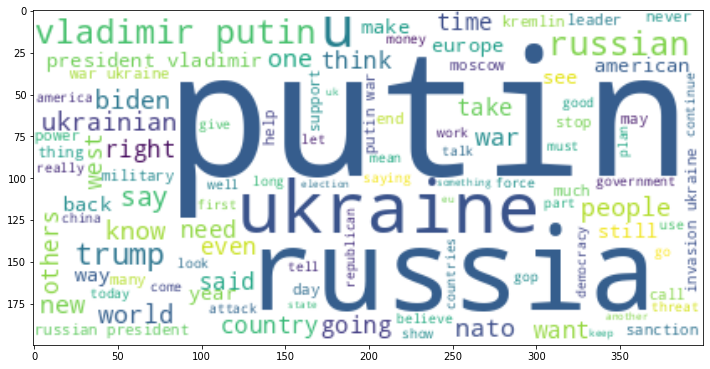

In [61]:
text = ' '.join(i for i in df_interim_p.Clean_Tweet)
wordcloud = WordCloud(max_words = 100, background_color = 'White').generate(text)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.show()

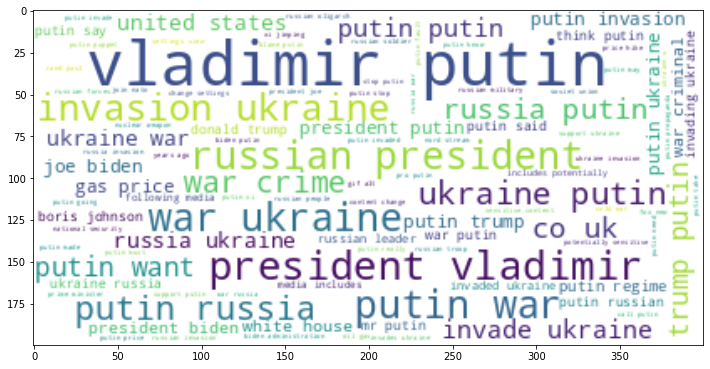

In [62]:
wordcloud_bg = WordCloud(collocation_threshold = 2, collocations = True, max_words = 100, background_color = 'White').generate(text)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud_bg, interpolation = 'bilinear')
plt.show()

Tweets that mention Zelensky

In [63]:
#Most retweeted tweets

df_interim_z.sort_values(by = 'Retweets', ascending = False)[['UserName','Clean_Tweet', 'Retweets']][:10]

,UserName,Clean_Tweet,Retweets
2882,@BenjaminRamm,inaugural address zelensky told lawmakers want picture offices president icon idol portrait hang kids photos instead look time making decision k k,620000
7830,@ZelenskyyUa,congratulations platinum anniversary reign queen majesty elizabeth ii grateful supporting fight freedom independence wish majesty well peace prosperity people k,65900
4028,@KyivIndependent,zelensky russian pilots want repeat russian pilots think orders carry killing civilians crime pay zelensky said today tomorrow less important main thing inevitable k,49300
3181,@BrianKarem,ukrainian president zelensky releases video statement counter russian propaganda fled country k,49200
6140,@KyivIndependent,zelensky ukraine seeks full restoration territory including crimea speaking wsj ceo council summit may president zelensky said ukraine goals halt russia advance reclaim territory restore ukraine entire territory diplomacy k,37100
9277,@ZelenskyyUa,commend us historic decision provide ua new security assistance package including modern air defense systems thank continued leadership support ua fight aggressor together towards victory k,34900
1529,@Jim_Jordan,media demanding president biden release transcript call president zelensky happened transparency matter president trump office k,33400
5427,@KyivIndependent,zelensky access weapons need partners would already ended war zelensky renewed calls weapons ukraine saying unfair ukraine still forced ask partners storing years k,31100
7186,@KyivIndependent,zelensky russia also leave crimea president zelensky said daily address russia also leave kherson melitopol enerhodar mariupol cities communities still pretending owners k,30800
2723,@antontroian,zelensky addressing russian people russian today initiated phone call president russian federation result silence though silence donbas result want address citizens russia k k,29800


In [64]:
#Most liked tweets

df_interim_z.sort_values(by = 'Likes', ascending = False)[['UserName','Clean_Tweet', 'Likes']][:10]

,UserName,Clean_Tweet,Likes
2882,@BenjaminRamm,inaugural address zelensky told lawmakers want picture offices president icon idol portrait hang kids photos instead look time making decision k k,103900
2723,@antontroian,zelensky addressing russian people russian today initiated phone call president russian federation result silence though silence donbas result want address citizens russia k k,10700
4028,@KyivIndependent,zelensky russian pilots want repeat russian pilots think orders carry killing civilians crime pay zelensky said today tomorrow less important main thing inevitable k,9922
4606,@ChristopherJM,powerful passionate address zelensky tonight switching ukrainian russian addresses mothers soldiers committed horrific war crimes bucha irpin hostomel asking raised butchers tells moscow see orders fulfilled k,9811
3542,@joshscampbell,still stunning hindsight zelensky ready continue cooperate next steps specifically almost ready buy javelins united states defense purposes trump would like us favor though cnn com read trump phone conversation volodymyr zelensky cnn politics president donald trump repeatedly pushed ukrainian president volodymr zelensky investigate former vice president joe biden son hunter july phone call according k,8565
1529,@Jim_Jordan,media demanding president biden release transcript call president zelensky happened transparency matter president trump office k,8113
3181,@BrianKarem,ukrainian president zelensky releases video statement counter russian propaganda fled country k,7134
5427,@KyivIndependent,zelensky access weapons need partners would already ended war zelensky renewed calls weapons ukraine saying unfair ukraine still forced ask partners storing years k,6647
6140,@KyivIndependent,zelensky ukraine seeks full restoration territory including crimea speaking wsj ceo council summit may president zelensky said ukraine goals halt russia advance reclaim territory restore ukraine entire territory diplomacy k,6453
5555,@DAlperovitch,zelensky throwing serious shade tonight know russians used talk biggest dream see paris die dream steal toilet die k,5829


In [65]:
#Common words

df_interim_z['Clean_Tweet'].str.split(expand = True).stack().value_counts()[:10]

ukraine      5190
zelensky     4924
president    2381
russia       2139
others       1953
ukrainian    1564
war          1422
russian      1381
putin        1332
people       1069
dtype: int64

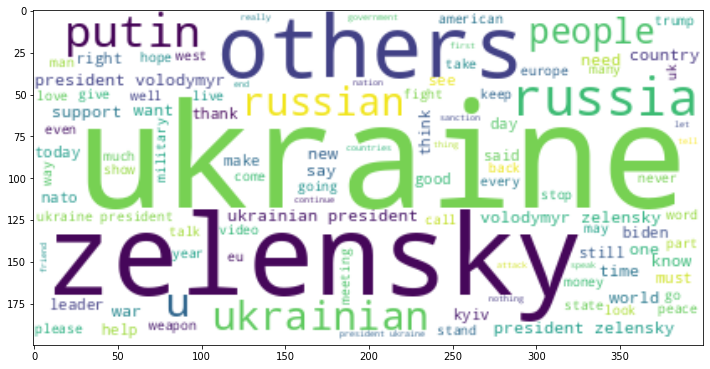

In [66]:
text = ' '.join(i for i in df_interim_z.Clean_Tweet)
wordcloud = WordCloud(max_words = 100, background_color = 'White').generate(text)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.show()


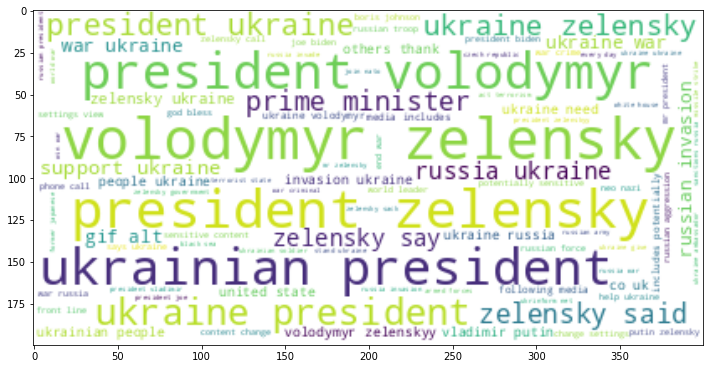

In [67]:
wordcloud_bg = WordCloud(collocation_threshold = 2, collocations = True, max_words = 100, background_color = 'White').generate(text)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud_bg, interpolation = 'bilinear')
plt.show()